In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
!ls 

PredicaoBH.ipynb
dados.xlsx
dados_ia.ipynb
data.csv
dtfinal.csv
dtfinal2.csv
dtfinal3.csv


In [54]:
dt = pd.read_csv('dtfinal3.csv', sep=";",encoding = 'unicode_escape')

In [55]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1.0,570000.0,3.0,14.0,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2.0,435000.0,2.0,15.0,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1.0,497850.0,1.0,15.0,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0.0,320000.0,1.0,17.0,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2.0,394000.0,1.0,17.0,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [56]:
dt.dtypes

Endereco      object
VlrCond        int64
Garagem      float64
Preco        float64
Quarto       float64
M2           float64
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [57]:
dt.VlrCond.max()

1500000

In [58]:
dt.Preco.min()

450.0

In [59]:
dt.Quarto.min()

1.0

In [60]:
dt.M2.min()

14.0

In [61]:
#Tratamento Inicial da Base

In [62]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Latitude'] = dt['Latitude'].replace({' ','.'},inplace=True)

In [63]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Longitude'] = dt['Longitude'].replace({' ','.'},inplace=True)

In [64]:
#dt['Latitude'] = dt['Latitude'].astype('float64')
#dt['Longitude'] = dt['Longitude'].astype('float64')

In [65]:
#dt['Garagem'] = dt['Garagem'].astype('float64')

In [66]:
#dt['Quarto'] = dt['Quarto'].astype('float64')


In [67]:
#dt['M2'] = dt['M2'].astype('float64')

In [68]:
#dt.dtypes

In [69]:
#dt.head()

In [70]:
#O coeficiente de correlação de Pearson é, em geral, considerado mais forte, assim como premissas mais elevadas sobre os dados.
#  No negativo, considera apenas uma dependência linear completa (adequada a uma linha reta) e em (teoria) requer que as 
#  variáveis sejam normalmente distribuídas. É muito frágil para os outliers (pontos únicos longe da norma).
#
#O coeficiente de correlação de classificação kendall deve ser mais eficiente com conjuntos menores. Ele mede a relação
#  monotônica entre duas variáveis, e é um pouco mais lento para calcular O(n^2). Não exige que as variáveis sejam distribuídas
#  normalmente.
#
#O coeficiente de correlação de spearman também mede a relação monotônica entre duas variáveis. A velocidade é mais rápida O
#  (n log(n)). Muitas vezes dá um valor um pouco maior do que Kendalls. Também não exige que as variáveis sejam distribuídas
#  normalmente.

In [71]:
correlacao =  dt.corr()

In [72]:
correlacao.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.011735,0.004342,0.013092,-0.000615,-0.004127,-0.000761
Garagem,0.011735,1.000000,0.304146,0.340029,0.112421,-0.002985,-0.006664
Preco,0.004342,0.304146,1.000000,0.159146,0.038882,0.014137,0.038940
Quarto,0.013092,0.340029,0.159146,1.000000,0.002796,-0.005764,0.012925
M2,-0.000615,0.112421,0.038882,0.002796,1.000000,0.006442,-0.002401


In [73]:
correlacao2 = dt.corr(method ='kendall')

In [74]:
correlacao2.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.150619,0.193648,0.283526,0.118509,-0.204803,0.080452
Garagem,0.150619,1.000000,0.543759,0.520386,0.483860,-0.101642,0.010949
Preco,0.193648,0.543759,1.000000,0.408797,0.536852,-0.154098,0.114049
Quarto,0.283526,0.520386,0.408797,1.000000,0.528496,-0.086507,0.040808
M2,0.118509,0.483860,0.536852,0.528496,1.000000,-0.071911,0.039087


In [75]:
correlacao3 =  dt.corr(method="spearman")

In [76]:
correlacao3.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.168225,0.226741,0.335091,0.120334,-0.294397,0.117473
Garagem,0.168225,1.000000,0.663456,0.587014,0.582379,-0.137301,0.013812
Preco,0.226741,0.663456,1.000000,0.512070,0.713641,-0.229405,0.169451
Quarto,0.335091,0.587014,0.512070,1.000000,0.615514,-0.119034,0.053802
M2,0.120334,0.582379,0.713641,0.615514,1.000000,-0.105368,0.058455


Text(0.5, 1.0, 'Correlação Pearson')

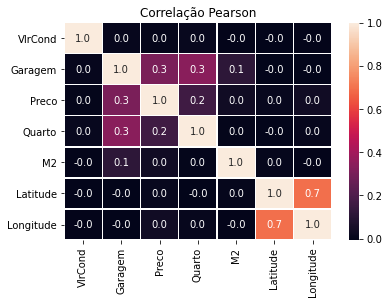

In [77]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.4)
plot
plt.title ("Correlação Pearson")

Text(0.5, 1.0, 'Correlação Kendall')

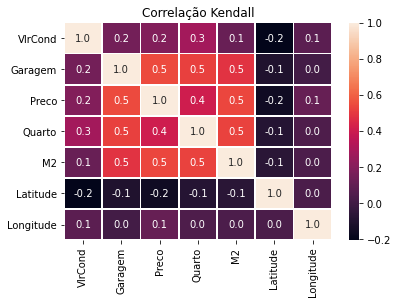

In [78]:
plot = sns.heatmap(correlacao2, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Kendall")

Text(0.5, 1.0, 'Correlação Spearman')

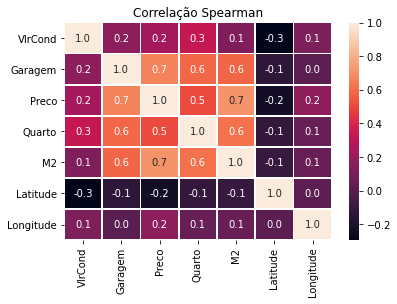

In [79]:
plot = sns.heatmap(correlacao3, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Spearman")

In [88]:
#dtlimpo = dt.drop('Bairro', 1)

In [89]:
dtlimpo.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
0,0,1.0,570000.0,3.0,14.0,-19.830800,-43.988105
1,0,2.0,435000.0,2.0,15.0,-19.844511,-43.981374
2,1,1.0,497850.0,1.0,15.0,-19.915643,-43.945380
3,0,0.0,320000.0,1.0,17.0,-19.931185,-43.937641
4,0,2.0,394000.0,1.0,17.0,-19.947254,-43.935269


In [90]:
dtlimpo = dtlimpo.drop('Cidade', 1)


KeyError: "['Cidade'] not found in axis"

In [91]:
dtlimpo = dtlimpo.drop('Endereco', 1)

KeyError: "['Endereco'] not found in axis"

In [ ]:
dtlimpo.head()

In [ ]:
dtlimpo.dtypes

In [35]:
#!pip install geopandas 

In [36]:
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import matplotlib.pyplot as plt

In [37]:
#scatter_plot = plt.scatter(dtlimpo['Longitude'], dtlimpo['Latitude'], alpha=0.5 )
#plt.show()

In [84]:
dt.sort_values('Preco')

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
283,Rua dos Goitacazes,0,0.0,450.0,1.0,44.0,Centro,Belo Horizonte,-19.922233,-43.941727
610,Rua Orion Rigel Vigne 195,159,1.0,550.0,2.0,55.0,Floramar,Belo Horizonte,-19.829822,-43.932753
316,Rua Sao Paulo,0,0.0,550.0,1.0,45.0,Centro,Belo Horizonte,-19.914782,-43.938801
14,Rua Paulo Afonso 146,0,0.0,650.0,1.0,21.0,Santo Antonio,Belo Horizonte,-19.946855,-43.946046
439,Rua Padre Pedro Pinto 2981,210,0.0,700.0,2.0,50.0,Venda Nova,Belo Horizonte,-19.818350,-43.953670
...,...,...,...,...,...,...,...,...,...,...
5861,Avenida do Contorno 6928,0,5.0,15000000.0,1.0,1100.0,Lourdes,Belo Horizonte,-19.915643,-43.945380
5907,Avenida Prudente de Morais,0,46.0,24000000.0,1.0,7188.0,Cidade Jardim,Belo Horizonte,-19.947413,-43.948534
5908,Avenida Amazonas 8000,0,0.0,35000000.0,1.0,9420.0,Glalija,Belo Horizonte,-19.937944,-43.999134
129,Rua Mato Grosso 355,0,0.0,130000000.0,1.0,31.0,Centro,Belo Horizonte,-19.917312,-43.946403


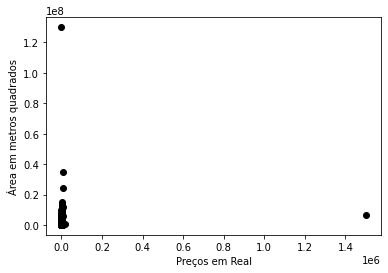

In [85]:
# Pontos do Gráfico na côr Preta (c = 'k')
plt.scatter(dtlimpo['M2'], dtlimpo['Preco'], c='k')

plt.xlabel("Preços em Real")
plt.ylabel("Área em metros quadrados")

plt.show()

In [40]:
#!pip install folium

In [41]:
import folium

In [42]:
mapa = folium.Map(location=[-19.9058278,-44.0005287])
mapa

In [43]:
#Estilos diferentes
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Toner',
)

In [44]:
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Terrain',
)

In [45]:
from folium import plugins

In [46]:
dtlimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VlrCond    5912 non-null   int64  
 1   Garagem    5911 non-null   float64
 2   Preco      5911 non-null   float64
 3   Quarto     5911 non-null   float64
 4   M2         5911 non-null   float64
 5   Latitude   5911 non-null   float64
 6   Longitude  5911 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 323.4 KB


In [47]:
#Colocando as coordenadas para a geração do gráfico
coordenadas=[]
for Latitude,Longitude in zip(dtlimpo.Latitude.values[:5922],dtlimpo.Longitude.values[:5922]):
  coordenadas.append([Latitude,Longitude])

In [48]:
coordenadas

[[-19.8307998, -43.9881048],
 [-19.8445112, -43.9813741],
 [-19.9156428, -43.9453796],
 [-19.9311846, -43.9376407],
 [-19.9472539, -43.9352691],
 [-19.9320955, -43.9393472],
 [-19.8551403, -43.9582535],
 [-19.9311846, -43.9376407],
 [-19.9033345, -43.9719762],
 [-19.9151776, -43.9347647],
 [-19.9261909, -43.93638],
 [-19.9379439, -43.9991336],
 [-19.9379439, -43.9991336],
 [-19.9760471, -43.9703167],
 [-19.9468549, -43.9460463],
 [-19.9748003, -43.9770588],
 [-19.9469331, -43.9212512],
 [-19.8609803, -43.9768403],
 [-19.9272246, -43.9290919],
 [-19.9364152, -43.9533964],
 [-19.9364152, -43.9533964],
 [-19.9469331, -43.9212512],
 [-19.9760471, -43.9703167],
 [-19.8609803, -43.9768403],
 [-19.9226563, -43.9216125],
 [-19.9226563, -43.9216125],
 [-19.9226563, -43.9216125],
 [-19.9313913, -43.9557993],
 [-19.936584, -43.9421163],
 [-19.936584, -43.9421163],
 [-19.9379439, -43.9991336],
 [-19.9469331, -43.9212512],
 [-19.8320775, -43.9115276],
 [-19.8610549, -43.9507507],
 [-19.8610549, -43

In [49]:
# Renderizando o mapa com algumas personalizações:
#mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
#localização do Senac Rio Preto
#mapa = folium.Map(location=[-20.8149,-49.3773],zoom_start=5,tiles='')




In [50]:
# Adicionando os registros no mapa de calor:
# 1 - Será criado um totalizador por bairro para saber quantidade de imoveis disponiveis
# 2 - Identificação de maior valor para o menor, por latitude x Longitude
#mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [142]:
dtlimpo['Latitude']

0      -17.373120
1      -18.211555
2      -18.587633
3      -18.763547
4      -18.763547
          ...    
5917   -20.225241
5918   -20.225241
5919   -20.225241
5920   -20.381093
5921          NaN
Name: Latitude, Length: 5922, dtype: float64

In [144]:
dtlimpo2=dtlimpo.drop(5921, 0)

In [145]:
dtlimpo2

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
0,0,10.0,11990000.0,4.0,4000.0,-17.373120,-44.975675
1,1100,3.0,680000.0,4.0,130.0,-18.211555,-45.235415
2,150,1.0,190000.0,2.0,60.0,-18.587633,-46.507540
3,0,4.0,2100000.0,4.0,350.0,-18.763547,-44.424484
4,0,4.0,3200000.0,4.0,387.0,-18.763547,-44.424484
...,...,...,...,...,...,...,...
5916,0,1.0,399999.0,2.0,110.0,-20.225241,-44.397780
5917,150,2.0,415000.0,2.0,100.0,-20.225241,-44.397780
5918,0,2.0,450000.0,3.0,190.0,-20.225241,-44.397780
5919,0,4.0,749000.0,3.0,142.0,-20.225241,-44.397780


In [148]:
dtlimpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5921 entries, 0 to 5920
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VlrCond    5921 non-null   int64  
 1   Garagem    5921 non-null   float64
 2   Preco      5921 non-null   float64
 3   Quarto     5921 non-null   float64
 4   M2         5921 non-null   float64
 5   Latitude   5921 non-null   float64
 6   Longitude  5921 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 370.1 KB


In [87]:
# inclusão de marcas nos locais dos imóveis
for _, Latitude in dtlimpo.iterrows():
    folium.Marker(
        location=[dtlimpo2['Latitude'].values, dtlimpo2['Longitude'].values],
    ).add_to(mapabh)

mapabh

NameError: name 'dtlimpo2' is not defined

In [157]:
dt=dt.drop(5921,0)

0.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape

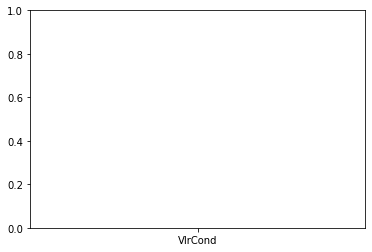

In [160]:
#Início dos estudos
labels = ['VlrCond', 'Garagem', 'Preco', 'Quarto', 'M2', 'Bairro']

#men_means = [20, 35, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, dt['VlrCond'], width, yerr=dt['VlrCond'], label='VlrCond')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()